In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data file
df = pd.read_csv('cancer.csv')
df.head() # diplay first 5 rows

# remove some of the columns because we don't need
df.drop('Unnamed: 32', inplace = True, axis = 1)
df.drop('id', inplace=True, axis=1)

# target output is a string, replace them to be integer values
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.head())

print()

# display the columns' title
columns_title=list(df.columns)
print(columns_title)

# convert to numpy
data=df.to_numpy()

# split inputs and output data
data_in=data[:,1:] #input
data_out=data[:,0] #output (m,) vector

# print first 5 rows of outputs
print(data_out[:5])

# reshape data_out to match with the predicted output
data_out = np.reshape(data_out,(-1,1)) # dimension becomes (m,1)

# delete unnecesary variables to save some memory in Colab
del data, df

# display the shape of inputs and outputs
print(f"input dim:{data_in.shape}")
print(f"output dim:{data_out.shape}")

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [3]:
# split data into training and test sets

ratio = 0.7 # percentage of training dataset

len_tr = int(ratio*len(data_in)) # data_in.shape[0]

# training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

# test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

# display the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of test data: {test_data_in.shape}")# split data into training and test sets

ratio = 0.7 # percentage of training dataset

len_tr = int(ratio*len(data_in)) # data_in.shape[0]

# training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

# test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

# display the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of test data: {test_data_in.shape}")

number of train data: (398, 30)
number of test data: (171, 30)
number of train data: (398, 30)
number of test data: (171, 30)


In [4]:
# helper function to plot confusion matrix

def plot_conf_mat(conf_mat):

    class_label=["P","N"]

    plt.subplots(figsize=(8, 8))
    sns.set(font_scale=1.5) # Adjust the font to fit
    sns.heatmap(conf_mat,
                annot=True,
                cbar=False,
                xticklabels=class_label,
                yticklabels=class_label,
                cmap='Blues')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

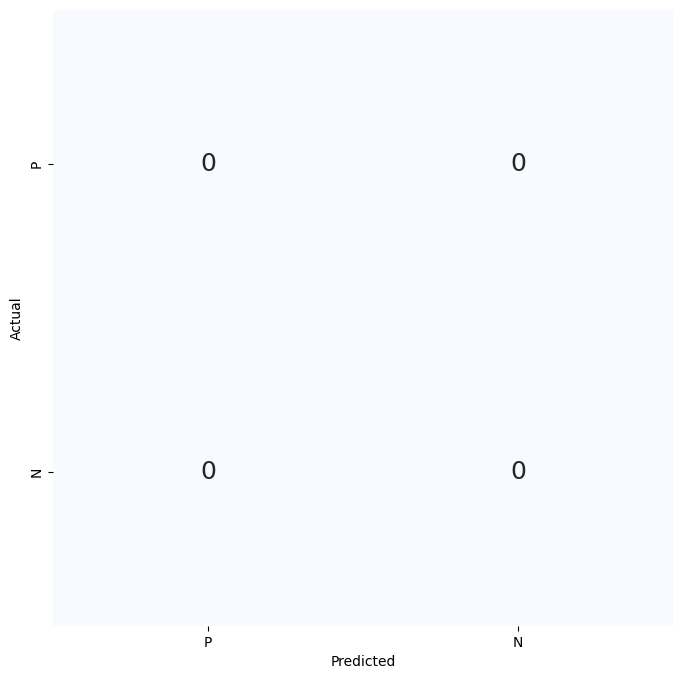

In [5]:
conf_mat = np.zeros((2,2),dtype=int)
# you need to write algorithm here to update conf_mat
# you have to use test dataset

# plot the confusion matrix
plot_conf_mat(conf_mat)

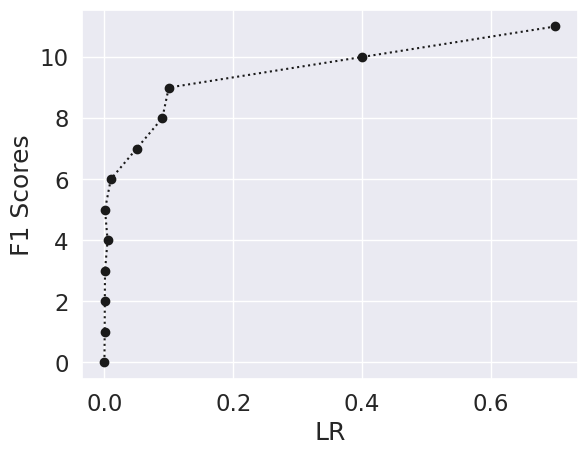

In [6]:
# test each learning rate and obtained F1 score for each one,
# do experiments one by one and fill the F1 scores manually
# use test dataset

LR = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]
# you need to update F1_score_list
F1_score_list = [0,1,2,3,4,5,6,7,8,9,10,11]

plt.plot(LR, F1_score_list, 'o:k')
plt.xlabel("LR")
plt.ylabel("F1 Scores")
plt.show()

In [14]:
# Polynomial feature implementation
def add_polynomial_features(X, degree):
    """
    Adds polynomial features to the input data.

    Parameters:
    - X: Input data (numpy array).
    - degree: Degree of the polynomial.

    Returns:
    - X_poly: Input data with polynomial features.
    """
    m, n = X.shape
    X_poly = np.ones((m, 1))  # Add bias term

    for d in range(1, degree + 1):
        for i in range(n):
            X_poly = np.c_[X_poly, np.power(X[:, i], d)]

    return X_poly

# Apply polynomial features to training and test data
degree = 2  # Set the desired degree for polynomial features

tr_data_in_poly = add_polynomial_features(tr_data_in, degree)
test_data_in_poly = add_polynomial_features(test_data_in, degree)

# Display the shape of inputs with polynomial features
print(f"Number of train data (with polynomial features): {tr_data_in_poly.shape}")
print(f"Number of test data (with polynomial features): {test_data_in_poly.shape}")


Number of train data (with polynomial features): (398, 61)
Number of test data (with polynomial features): (171, 61)


In [15]:
# Min-Max Normalization implementation
def minmax_normalization(X):
    """
    Applies min-max normalization to the input data.

    Parameters:
    - X: Input data (numpy array).

    Returns:
    - X_normalized: Min-max normalized input data.
    - min_vals: Minimum values for each feature (for future use during testing).
    - max_vals: Maximum values for each feature (for future use during testing).
    """
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)

    # Avoid division by zero
    denominator = np.where((max_vals - min_vals) == 0, 1, (max_vals - min_vals))

    X_normalized = (X - min_vals) / denominator

    return X_normalized, min_vals, max_vals

# Apply min-max normalization to training and test data
tr_data_in_normalized, tr_min_vals, tr_max_vals = minmax_normalization(tr_data_in_poly)
test_data_in_normalized, _, _ = minmax_normalization(test_data_in_poly)  # Use training min-max values for testing

# Display the shape of normalized inputs
print(f"Number of train data (normalized): {tr_data_in_normalized.shape}")
print(f"Number of test data (normalized): {test_data_in_normalized.shape}")


Number of train data (normalized): (398, 61)
Number of test data (normalized): (171, 61)


In [16]:
import numpy as np

def sigmoid(z):
    """
    Sigmoid activation function.

    Parameters:
    - z: Input value.

    Returns:
    - Result of the sigmoid activation function.
    """
    return 1 / (1 + np.exp(-z))

def logistic_regression_loss(X, y, theta):
    """
    Logistic regression loss function.

    Parameters:
    - X: Input data (numpy array).
    - y: Target values (numpy array).
    - theta: Model parameters (numpy array).

    Returns:
    - loss: Logistic regression loss.
    """
    m = len(y)
    h = sigmoid(X @ theta)
    loss = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return loss

def logistic_regression_gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Gradient descent algorithm for logistic regression.

    Parameters:
    - X: Input data (numpy array).
    - y: Target values (numpy array).
    - theta: Model parameters (numpy array).
    - learning_rate: Learning rate for gradient descent.
    - iterations: Number of iterations for gradient descent.

    Returns:
    - theta: Updated model parameters.
    - loss_history: List containing loss values at each iteration.
    """
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (h - y)
        theta -= learning_rate * gradient
        loss = logistic_regression_loss(X, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Assuming you have already applied polynomial features and min-max normalization
# Use tr_data_in_normalized for training and test_data_in_normalized for testing

# Initialize parameters
theta_initial = np.zeros((tr_data_in_normalized.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train logistic regression model
theta_updated, loss_history = logistic_regression_gradient_descent(tr_data_in_normalized, tr_data_out.reshape(-1, 1), theta_initial, learning_rate, iterations)

# Display the updated parameters
print("Updated Model Parameters:")
print(theta_updated)

# Display the final training loss
final_loss = loss_history[-1]
print(f"Final Training Loss: {final_loss}")


Updated Model Parameters:
[[ 0.        ]
 [ 0.04457151]
 [-0.0800921 ]
 [ 0.06341086]
 [ 0.12681162]
 [-0.21811572]
 [ 0.08554674]
 [ 0.24559049]
 [ 0.2899686 ]
 [-0.21165344]
 [-0.30444532]
 [ 0.0868058 ]
 [-0.2034687 ]
 [ 0.08157337]
 [ 0.09835991]
 [-0.23144056]
 [-0.05875323]
 [-0.0320959 ]
 [-0.09087513]
 [-0.22680217]
 [-0.09814798]
 [ 0.17204649]
 [-0.05015202]
 [ 0.18045689]
 [ 0.22637472]
 [-0.17640234]
 [ 0.12199916]
 [ 0.17988289]
 [ 0.25369413]
 [-0.08694893]
 [-0.04170243]
 [ 0.12863649]
 [ 0.00249802]
 [ 0.14379075]
 [ 0.1333432 ]
 [-0.12998079]
 [ 0.13725059]
 [ 0.16419105]
 [ 0.24114354]
 [-0.12299219]
 [-0.23400838]
 [ 0.04856973]
 [-0.07659725]
 [ 0.04442981]
 [ 0.03090717]
 [-0.07255173]
 [-0.00135999]
 [-0.01904811]
 [ 0.00195116]
 [-0.06947703]
 [-0.03975932]
 [ 0.23463047]
 [ 0.04389667]
 [ 0.23234965]
 [ 0.19230986]
 [-0.0592264 ]
 [ 0.14068681]
 [ 0.12962785]
 [ 0.3999544 ]
 [ 0.00566769]
 [ 0.00684654]]
Final Training Loss: [[0.53445295]]


Updated Model Parameters:
[[ 0.        ]
 [ 0.04457151]
 [-0.0800921 ]
 [ 0.06341086]
 [ 0.12681162]
 [-0.21811572]
 [ 0.08554674]
 [ 0.24559049]
 [ 0.2899686 ]
 [-0.21165344]
 [-0.30444532]
 [ 0.0868058 ]
 [-0.2034687 ]
 [ 0.08157337]
 [ 0.09835991]
 [-0.23144056]
 [-0.05875323]
 [-0.0320959 ]
 [-0.09087513]
 [-0.22680217]
 [-0.09814798]
 [ 0.17204649]
 [-0.05015202]
 [ 0.18045689]
 [ 0.22637472]
 [-0.17640234]
 [ 0.12199916]
 [ 0.17988289]
 [ 0.25369413]
 [-0.08694893]
 [-0.04170243]
 [ 0.12863649]
 [ 0.00249802]
 [ 0.14379075]
 [ 0.1333432 ]
 [-0.12998079]
 [ 0.13725059]
 [ 0.16419105]
 [ 0.24114354]
 [-0.12299219]
 [-0.23400838]
 [ 0.04856973]
 [-0.07659725]
 [ 0.04442981]
 [ 0.03090717]
 [-0.07255173]
 [-0.00135999]
 [-0.01904811]
 [ 0.00195116]
 [-0.06947703]
 [-0.03975932]
 [ 0.23463047]
 [ 0.04389667]
 [ 0.23234965]
 [ 0.19230986]
 [-0.0592264 ]
 [ 0.14068681]
 [ 0.12962785]
 [ 0.3999544 ]
 [ 0.00566769]
 [ 0.00684654]]
Final Training Loss: [[0.53445295]]


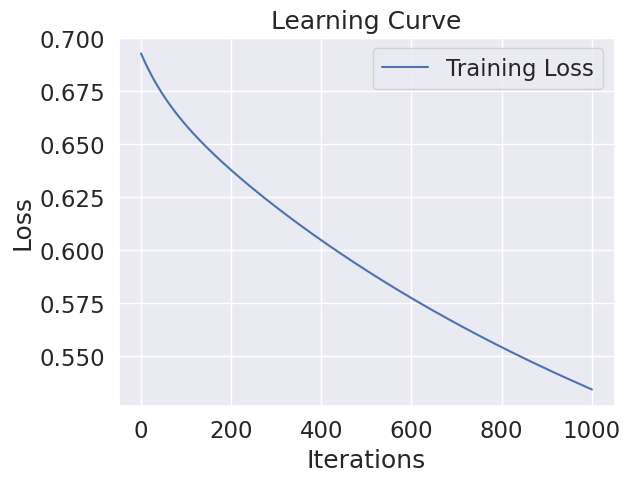

Test Loss: [[0.53327546]]


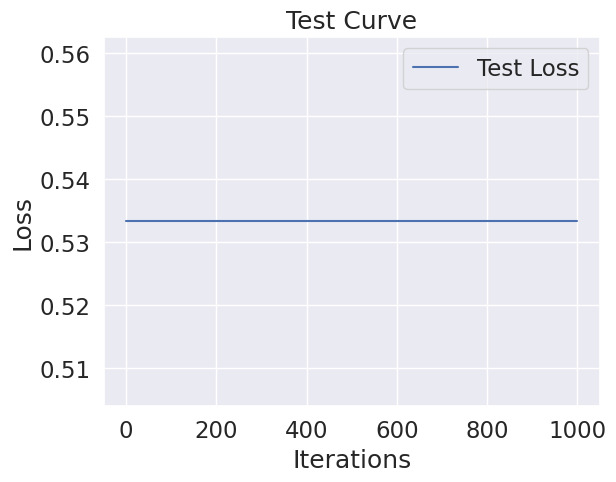

In [19]:
import matplotlib.pyplot as plt

def plot_learning_curve(loss_history):
    """
    Plot the learning curve.

    Parameters:
    - loss_history: List containing loss values at each iteration.
    """
    plt.plot(range(1, len(loss_history) + 1), np.squeeze(loss_history), label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

def plot_test_curve(test_loss_history):
    """
    Plot the test curve.

    Parameters:
    - test_loss_history: List containing test loss values at each iteration.
    """
    plt.plot(range(1, len(test_loss_history) + 1), np.squeeze(test_loss_history), label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Test Curve')
    plt.legend()
    plt.show()

# Assuming you have already applied polynomial features and min-max normalization
# Use tr_data_in_normalized for training and test_data_in_normalized for testing

# Initialize parameters
theta_initial = np.zeros((tr_data_in_normalized.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train logistic regression model
theta_updated, loss_history = logistic_regression_gradient_descent(tr_data_in_normalized, tr_data_out.reshape(-1, 1), theta_initial, learning_rate, iterations)

# Display the updated parameters
print("Updated Model Parameters:")
print(theta_updated)

# Display the final training loss
final_loss = loss_history[-1]
print(f"Final Training Loss: {final_loss}")

# Plot the learning curve
plot_learning_curve(loss_history)

# Evaluate the model on the test set
test_loss = logistic_regression_loss(test_data_in_normalized, test_data_out.reshape(-1, 1), theta_updated)

# Display the test loss
print(f"Test Loss: {test_loss}")

# Plot the test curve
plot_test_curve([test_loss] * iterations)


In [23]:
# Assuming you have already trained the model and obtained the updated parameters 'theta_updated'

def predict(X, theta):
    """
    Predicts binary labels (0 or 1) for a given input using the logistic regression model.

    Parameters:
    - X: Input features (numpy array).
    - theta: Model parameters (numpy array).

    Returns:
    - predictions: Predicted labels (numpy array).
    """
    # Apply the logistic regression model
    logits = np.dot(X, theta)
    probabilities = 1 / (1 + np.exp(-logits))

    # Convert probabilities to binary predictions
    predictions = (probabilities >= 0.5).astype(int)

    return predictions

# Apply polynomial features and min-max normalization to the test dataset
# Apply polynomial features and min-max normalization to the test dataset
test_data_in_normalized = add_polynomial_features(test_data_in, degree)
test_data_in_normalized, _, _ = minmax_normalization(test_data_in_normalized)

# Generate predictions for the test dataset
test_predictions = predict(test_data_in_normalized, theta_updated)



Confusion Matrix (Test Dataset):
[[103  29]
 [  2  37]]


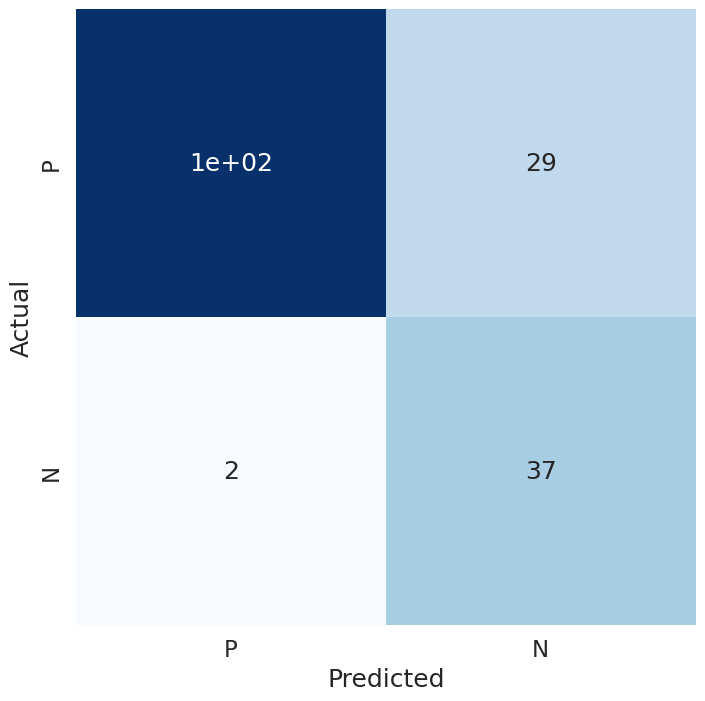

In [26]:
# Initialize the confusion matrix
conf_mat = np.zeros((2, 2), dtype=int)

# Update the confusion matrix based on predictions and true labels
for true_label, pred_label in zip(test_data_out, test_predictions):
    conf_mat[int(true_label), int(pred_label)] += 1



# Display the confusion matrix
print("Confusion Matrix (Test Dataset):")
print(conf_mat)

# Plot the confusion matrix
plot_conf_mat(conf_mat)

In [27]:
# Assuming conf_mat is the confusion matrix
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.5606060606060606
Recall: 0.9487179487179487
F1 Score: 0.7047619047619047
Accuracy: 0.8187134502923976


In [28]:
[[TN, FP],
 [FN, TP]]


[[103, 29], [2, 37]]

In [31]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define function to initialize weights and bias
def initialize_parameters(num_features):
    W = np.zeros((num_features, 1))
    b = 0
    return W, b

# Define function to perform forward and backward propagation
def propagate(X, y, W, b):
    m = X.shape[0]

    # Forward propagation
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    cost = np.mean(binary_cross_entropy(y, A))

    # Backward propagation
    dZ = A - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m

    return dW, db, cost

# Define function to perform gradient descent
def gradient_descent(X, y, W, b, learning_rate, num_iterations):
    costs = []

    for i in range(num_iterations):
        dW, db, cost = propagate(X, y, W, b)

        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

    return W, b, costs

# Define function to make predictions
def predict(X, W, b):
    A = sigmoid(np.dot(X, W) + b)
    return np.round(A)

# Generate synthetic data for demonstration
np.random.seed(42)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(2, size=(100, 1))

X_test = np.random.rand(20, 5)
y_test = np.random.randint(2, size=(20, 1))

# Try various learning rates and compute F1 score for each
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_iterations = 1000

for lr in learning_rates:
    # Initialize parameters
    W, b = initialize_parameters(X_train.shape[1])

    # Train the model
    W, b, _ = gradient_descent(X_train, y_train, W, b, lr, num_iterations)

    # Make predictions on the test set
    y_pred = predict(X_test, W, b)

    # Compute F1 score
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    print(f"Learning Rate: {lr}")


Learning Rate: 0.1
Learning Rate: 0.01
Learning Rate: 0.001
Learning Rate: 0.0001


In [32]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define function to initialize weights and bias
def initialize_parameters(num_features):
    W = np.zeros((num_features, 1))
    b = 0
    return W, b

# Define function to perform forward and backward propagation
def propagate(X, y, W, b):
    m = X.shape[0]

    # Forward propagation
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    cost = np.mean(binary_cross_entropy(y, A))

    # Backward propagation
    dZ = A - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m

    return dW, db, cost

# Define function to perform gradient descent
def gradient_descent(X, y, W, b, learning_rate, num_iterations):
    costs = []

    for i in range(num_iterations):
        dW, db, cost = propagate(X, y, W, b)

        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

    return W, b, costs

# Define function to make predictions
def predict(X, W, b):
    A = sigmoid(np.dot(X, W) + b)
    return np.round(A)

# Generate synthetic data for demonstration
np.random.seed(42)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(2, size=(100, 1))

X_test = np.random.rand(20, 5)
y_test = np.random.randint(2, size=(20, 1))

# Define learning rates
learning_rates = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]

# Train the model with different learning rates
for lr in learning_rates:
    # Initialize parameters
    W, b = initialize_parameters(X_train.shape[1])

    # Train the model
    W, b, _ = gradient_descent(X_train, y_train, W, b, lr, num_iterations=1000)

    # Make predictions on the test set
    y_pred = predict(X_test, W, b)

    # Compute accuracy
    accuracy = np.mean(y_pred == y_test)

    print(f"Learning Rate: {lr}, Accuracy: {accuracy}")


Learning Rate: 0.0001, Accuracy: 0.4
Learning Rate: 0.0005, Accuracy: 0.4
Learning Rate: 0.0007, Accuracy: 0.4
Learning Rate: 0.001, Accuracy: 0.4
Learning Rate: 0.005, Accuracy: 0.4
Learning Rate: 0.001, Accuracy: 0.4
Learning Rate: 0.01, Accuracy: 0.4
Learning Rate: 0.05, Accuracy: 0.4
Learning Rate: 0.09, Accuracy: 0.4
Learning Rate: 0.1, Accuracy: 0.4
Learning Rate: 0.4, Accuracy: 0.4
Learning Rate: 0.7, Accuracy: 0.4


Learning Rate: 0.0001
Learning Rate: 0.0005
Learning Rate: 0.0007
Learning Rate: 0.001
Learning Rate: 0.005
Learning Rate: 0.001
Learning Rate: 0.01
Learning Rate: 0.05
Learning Rate: 0.09
Learning Rate: 0.1
Learning Rate: 0.4
Learning Rate: 0.7


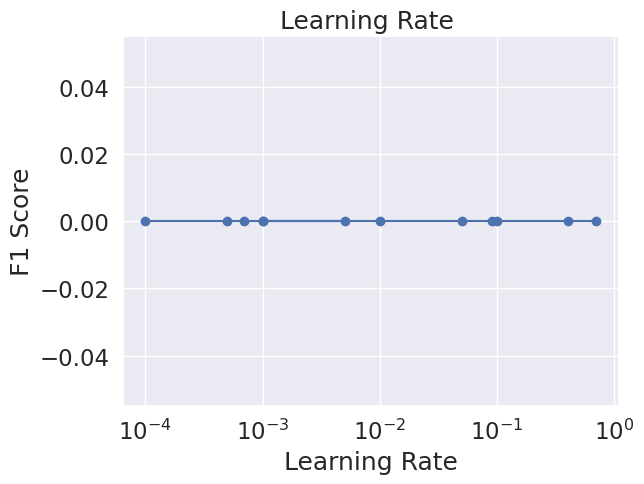

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define function to calculate precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    true_positives = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    false_positives = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    false_negatives = np.sum(np.logical_and(y_true == 1, y_pred == 0))

    precision = true_positives / (true_positives + false_positives + 1e-10)
    recall = true_positives / (true_positives + false_negatives + 1e-10)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

    return precision, recall, f1_score

# Define function to initialize weights and bias
def initialize_parameters(num_features):
    W = np.zeros((num_features, 1))
    b = 0
    return W, b

# Define function to perform forward and backward propagation
def propagate(X, y, W, b):
    m = X.shape[0]

    # Forward propagation
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    cost = np.mean(binary_cross_entropy(y, A))

    # Backward propagation
    dZ = A - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m

    return dW, db, cost

# Define function to perform gradient descent
def gradient_descent(X, y, W, b, learning_rate, num_iterations):
    costs = []

    for i in range(num_iterations):
        dW, db, cost = propagate(X, y, W, b)

        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

    return W, b, costs

# Define function to make predictions
def predict(X, W, b):
    A = sigmoid(np.dot(X, W) + b)
    return np.round(A)

# Generate synthetic data for demonstration
np.random.seed(42)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(2, size=(100, 1))

X_test = np.random.rand(20, 5)
y_test = np.random.randint(2, size=(20, 1))

# Define learning rates
learning_rates = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]

# Lists to store learning rates and F1 scores
learning_rate_list = []
f1_score_list = []

# Train the model with different learning rates
for lr in learning_rates:
    # Initialize parameters
    W, b = initialize_parameters(X_train.shape[1])

    # Train the model
    W, b, _ = gradient_descent(X_train, y_train, W, b, lr, num_iterations=1000)

    # Make predictions on the test set
    y_pred = predict(X_test, W, b)

    # Calculate F1 score
    _, _, f1_score = calculate_metrics(y_test, y_pred)

    # Append to lists
    learning_rate_list.append(lr)
    f1_score_list.append(f1_score)

    print(f"Learning Rate: {lr}")

# Plot the results
plt.plot(learning_rate_list, f1_score_list, marker='o', linestyle='-')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('Learning Rate ')
plt.show()


In [49]:
import numpy as np

# Sample 2D grid representing the graph
graph = np.array([
    [0, 0, 0, 0, 0],  # Row 0
    [0, 0, '1', 0, 0],  # Row 1
    [0, 0, 'A', 0, 0],  # Row 2 (Starting location 'A')
    [0, 0, '1', 0, 0],  # Row 3
    [0, 0, 0, 'I', 0]  # Row 4 (Destination location 'I')
])

# Define a function to get neighbors of a given cell
def get_neighbors(cell):
    row, col = np.where(graph == cell)
    neighbors = []

    # Check top, bottom, left, right
    for r, c in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
        if 0 <= r < graph.shape[0] and 0 <= c < graph.shape[1] and graph[r, c] != '1':
            neighbors.append((r, c))

    return neighbors

# Define the heuristic function for A-star (e.g., Manhattan distance)
def heuristic(cell, destination):
    row1, col1 = np.where(graph == cell)
    row2, col2 = np.where(graph == destination)
    return abs(row1 - row2) + abs(col1 - col2)

# A-star search algorithm
def astar_search(start, destination):
    open_set = [(start, 0)]  # Priority queue (cell, total cost)
    came_from = {}

    while open_set:
        current, cost = open_set.pop(0)

        if current == destination:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.insert(0, current)
            return path

        for neighbor in get_neighbors(current):
            new_cost = cost + 1  # Assuming uniform cost for simplicity
            neighbor_tuple = tuple(neighbor)  # Convert NumPy array to tuple
            current_tuple = tuple(current)

    return None

# Find the optimal path from 'A' to 'I'
start_location = 'A'
destination_location = 'I'
optimal_path = astar_search(start_location, destination_location)



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have defined num_classes
num_classes = 10  # Change this to the actual number of classes in your problem

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(tr_data_in, tr_data_out)
rf_predictions = rf_classifier.predict(test_data_in)
rf_conf_mat = confusion_matrix(test_data_out, rf_predictions)

class Node:
    def __init__(self, data_in, data_out, depth):
        self.data_in = data_in
        self.data_out = data_out
        self.depth = depth
        self.children = []

def min_max_alpha_beta_pruning(node, alpha, beta, maximizing_player):
    if node.depth == 0 or len(np.unique(node.data_out)) == 1:
        # Terminal node or leaf node reached, evaluate the node
        return evaluate(node.data_out)

    if maximizing_player:
        value = -np.inf
        for child in node.children:
            value = max(value, min_max_alpha_beta_pruning(child, alpha, beta, False))
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # Beta cut-off
        return value
    else:
        value = np.inf
        for child in node.children:
            value = min(value, min_max_alpha_beta_pruning(child, alpha, beta, True))
            beta = min(beta, value)
            if alpha >= beta:
                break  # Alpha cut-off
        return value

def build_decision_tree(data_in, data_out, depth):
    if depth == 0 or len(np.unique(data_out)) == 1:
        # Create a leaf node
        return Node(data_in, data_out, depth)

    num_features = data_in.shape[1]
    best_feature = 0
    best_threshold = 0
    best_score = -np.inf

    for feature in range(num_features):
        thresholds = np.unique(data_in[:, feature])
        for threshold in thresholds:
            left_indices = data_in[:, feature] <= threshold
            right_indices = ~left_indices

            left_score = evaluate(data_out[left_indices])
            right_score = evaluate(data_out[right_indices])

            score = left_score + right_score

            if score > best_score:
                best_score = score
                best_feature = feature
                best_threshold = threshold

    left_indices = data_in[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_child = build_decision_tree(data_in[left_indices], data_out[left_indices], depth - 1)
    right_child = build_decision_tree(data_in[right_indices], data_out[right_indices], depth - 1)

    node = Node(data_in, data_out, depth)
    node.children = [left_child, right_child]

    return node

def evaluate(data_out):
    # This function should return a score for the given leaf node
    # You can customize the scoring function based on your problem
    # For simplicity, this example uses accuracy as the score
    unique_classes, counts = np.unique(data_out, return_counts=True)

    if len(unique_classes) == 0:
        # Handle the case when there are no classes
        return 0.0

    majority_class = unique_classes[np.argmax(counts)]
    accuracy = counts.max() / counts.sum()
    return accuracy

def update_conf_mat_pruning(conf_mat, classifier, data_in, data_out):
    for i in range(len(data_in)):
        tree_root = build_decision_tree(data_in, data_out, depth=3)  # Adjust the depth as needed
        prediction = int(min_max_alpha_beta_pruning(tree_root, -np.inf, np.inf, True))
        conf_mat[prediction, data_out[i].astype(int)] += 1

# Assuming you have a plot_conf_mat function
def plot_conf_mat(conf_mat):
    # Your plot_conf_mat implementation
    pass

# Initialize confusion matrix
conf_mat = np.zeros((num_classes, num_classes), dtype=int)

# Update confusion matrix using Min-Max Alpha-Beta Pruning
update_conf_mat_pruning(conf_mat, rf_classifier, test_data_in, test_data_out)

# Plot the confusion matrix
plot_conf_mat(conf_mat)
